In [123]:
# Imports
import textstat # Readability measure library
from bs4 import BeautifulSoup # HTML parser library
import os # Library to help navigate directories
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline
import time
import re # Regular expressions library
import nltk # NLP libray

### Cleaning articles and extracting readability scores

In [187]:
start_time = time.time()

# Creating lists to store readability scores in.
article = []; smog_index = []; coleman_liau_index = []; flesch_reading_ease = []; gunning_fog = []
automated_readability_index = []; linsear_write_formula = []; dale_chall_readability_score = []

lexicon_count = []; sentence_count = []

# Loop through articles in certain directory path
directory1 = 'C:/Users/marco/Downloads/Learning R/Pvalueproject/Articles/'
for folder in os.listdir(directory1):
    print(folder, '|', end ='')
    
    directory2 = 'C:/Users/marco/Downloads/Learning R/Pvalueproject/Articles/' + folder + '/'
    for filename in os.listdir(directory2):
        file = directory2 + filename
        soup = BeautifulSoup(open(file, 'r', encoding='utf8'), 'html.parser')
    
    # Find text part of html document 
        try:
            text = soup.find('div', class_= 'article__body') # "article__body", "hlFld-Abstract", "hlFld-Fulltext"
            text = text.get_text().replace('\n','')
        except:
            text = soup.find('div', class_= "article fulltext-view ")
            text = text.get_text().replace('\n','')

    # Define aspects that should be removed from the article text
        tables = soup.find_all('div', class_='article-table-content') # finds the text in the tables   
        figures = soup.find_all('figure', class_='article__inlineFigure') # Finds the text in the figures (titles)

    # Remove the aspects from the article body
        for i in range(len(tables)):
            text = text.replace(tables[i].get_text(),'') # Removes the table text from the body text

        for i in range(len(figures)):
            text = text.replace(figures[i].get_text(),'') # Removes the figure text from the body text

    # A function that cleans the resulting text and returns the text.
        def cleaner(text):
            text = re.sub(r"\([^\)]*(,|:)[^\)]*\)", "", text) # A way to remove in text citation
            text = re.sub(r"(APPENDIX).*", "", text) # A way to remove the reference list
            text = re.sub(r"(REFERENCES).*", "", text) # A way to remove the reference list
            text = re.sub(r"(\s)\s+", " ", text) # A way to remove excess spaces
            text = re.sub(r"(\s)\.", ".", text) # Reformat weird periods
            text = re.sub(r"\.[^\s]", ". ", text) # Reformat weird periods
            return text
        
        text = cleaner(text)
        
    # Get index scores
        article.append( filename[:-5])
        smog_index.append( textstat.smog_index(text))
        coleman_liau_index.append( textstat.coleman_liau_index(text))
        flesch_reading_ease.append( textstat.flesch_reading_ease(text))
        gunning_fog.append( textstat.gunning_fog(text))
        automated_readability_index.append( textstat.automated_readability_index(text))
        linsear_write_formula.append( textstat.linsear_write_formula(text))
        dale_chall_readability_score.append( textstat.dale_chall_readability_score(text))
    
        # Get other info
        lexicon_count.append(textstat.lexicon_count(text, removepunct=True))
        sentence_count.append(textstat.sentence_count(text))
        
        print('=', end ='')
        
    elapsed_time = round(time.time() - start_time,1)
    print('| {:.1f} minutes'.format(elapsed_time/60))

elapsed_time = round(time.time() - start_time,1)
print('Completed in: {:.1f} minutes'.format(elapsed_time/60))

2002 |======================| 0.3 minutes
2003 |================================================| 1.0 minutes
2004 |========================================================| 1.8 minutes
2005 |========================================================| 2.8 minutes
2006 |================================================================| 3.8 minutes
2007 |========================================================| 5.1 minutes
2008 |======================================================| 6.3 minutes
2009 |========================================================| 7.5 minutes
2010 |================================================================| 9.0 minutes
2011 |======================================================| 10.4 minutes
2012 |============================================================| 12.0 minutes
2013 |==========================================================================| 13.8 minutes
2014 |========================================================================| 15.7 minutes


In [193]:
# Word frequencies experiment
text_tok = nltk.word_tokenize(text)
freqs = nltk.FreqDist(text_tok)
print(freqs.most_common(25), end=" ")

[(',', 777), ('.', 571), ('the', 415), ('of', 406), ('and', 286), ('to', 248), ('(', 193), (')', 193), ('a', 178), ('in', 159), (':', 147), ('restatement', 125), ('that', 110), ('firms', 100), ('turnover', 88), ('as', 76), ('firm', 74), ('&', 72), ('is', 71), ('are', 69), ('for', 67), ('by', 64), ('financial', 59), (';', 59), ('legitimacy', 58)] 

In [194]:
# Create dataframe for readability scores
df = pd.DataFrame(article, columns = ['source'])

# Insert each readability index
df.insert(1, 'smog_index', smog_index)
df.insert(2, 'coleman_liau_index', coleman_liau_index)
df.insert(3, 'flesch_reading_ease', flesch_reading_ease)
df.insert(4, 'gunning_fog', gunning_fog)
df.insert(5, 'automated_readability_index', automated_readability_index)
df.insert(6, 'linsear_write_formula', linsear_write_formula)
df.insert(7, 'dale_chall_readability_score', dale_chall_readability_score)
df.insert(8, 'lexicon_count', lexicon_count)
df.insert(9, 'sentence_count', sentence_count)
print('Varaibles:', df.shape[1], 'Instances:',df.shape[0])
df.head(5)

Varaibles: 10 Instances: 1104


,source,smog_index,coleman_liau_index,flesch_reading_ease,gunning_fog,automated_readability_index,linsear_write_formula,dale_chall_readability_score,lexicon_count,sentence_count
0,A Golden Rule Over Time_ Reciprocity in Interg...,19.1,14.86,21.47,15.36,21.1,25.00,6.78,11569,355
1,Charting Time_ Timelines as Temporal Boundary ...,15.4,13.47,44.68,13.23,17.1,19.25,6.85,9947,377
2,Comparing Alternative Conceptualizations of Fu...,20.9,16.84,9.66,16.81,24.4,21.25,7.03,9371,261
3,Creative Self-Efficacy_ Its Potential Antecede...,18.1,16.19,17.57,14.32,20.3,15.40,7.10,6067,216
4,Fatigued and Dissatisfied or Fatigued but Sati...,18.1,16.14,25.12,15.01,20.4,19.50,7.32,4228,146


In [195]:
### Cleaned readability scores ###
df.to_csv(r'C:\Users\marco\Documents\1) MSc Data Science and Society\Natural Language Processing\readability_scores_cleaned.csv', index=True)

### Import statcheck result

In [8]:
# Import statcheck data from csv file
df2 = pd.read_csv('../data/Statcheck results.csv', index_col=None, encoding = 'Windows-1252')

# Aggregate articles to have one unique entry per article that has a coresponding number of misreported p-values.
df2 = df2.groupby(['source']).sum()

# Reformat the dataframe to enable the merging of df and df2.
df2.reset_index(level=0, inplace=True)
df2

df2['error_binary'] = [0]*len(df2['error'])
j = 0
for i in df2['error']:
    if i > 0:
        df2['error_binary'][j] = 1
    j += 1
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,source,error,error_binary
0,10.5465.amj.2015.1196,1.0,1
1,10.5465.amj.2016.1322,0.0,0
2,10.5465.amj.2017.0149,0.0,0
3,10.5465.amj.2017.0245,0.0,0
4,A (Blurry) Vision of the Future_ How Leader Rh...,0.0,0
5,A Longitudinal Examination of the Influence of...,0.0,0
6,A Multilevel Field Investigation of Emotional ...,0.0,0
7,A New Model of Work Role Performance_ Positive...,0.0,0
8,A Social Mindfulness Approach to Understanding...,0.0,0
9,Actions Speak Louder than Words_ How Figurativ...,1.0,1


In [238]:
print('{}%  successfully checked articles.'.format(round(129/1104*100,1)))
print('{}%  of checked articles misreported p-values.'.format(round(df2['error_binary'].sum()/129*100,1)))
print('{:>5}  articles probably gone undetected.'.format(int(round((1104-129)*df2['error_binary'].sum()/129))))

11.7%  successfully checked articles.
31.8%  of checked articles misreported p-values.
  310  articles probably gone undetected.


### Merging all articles with the statcheck data (regardless of whether statcheck found p-values)

In [255]:
# Merge the readability data with the statcheck data
df3 = 0
df3 = df.drop('error', axis = 1)
df3 = df3.drop('error_binary', axis = 1)
df4 = df3.merge(df2, left_on = ['source'], right_on = ['source'], how='right')

# Give articles with no misreported p-values a value of zero.
# df3 = df.fillna(0)
        
# df['error_binary'] = pd.get_dummies(df['error'])
print(df4.shape)
df4.head(5)

(129, 12)


,source,smog_index,coleman_liau_index,flesch_reading_ease,gunning_fog,automated_readability_index,linsear_write_formula,dale_chall_readability_score,lexicon_count,sentence_count,error,error_binary
0,"Employees' Goal Orientations, the Quality of L...",20.3,18.29,6.78,15.14,22.9,20.250000,7.02,7510,247,1.0,1
1,A Longitudinal Examination of the Influence of...,18.4,16.89,19.30,13.66,19.9,18.800000,6.99,5089,193,0.0,0
2,Learning and Performance in Multidisciplinary ...,20.5,16.84,10.37,17.03,24.0,17.400000,7.32,8016,228,0.0,0
3,Team Diversity and Information Use _ Academy o...,18.8,15.85,15.04,14.99,20.9,23.750000,7.02,8800,288,0.0,0
4,"When is an Hour Not 60 Minutes_ Deadlines, Tem...",17.3,13.99,30.03,15.47,20.3,10.571429,7.03,8719,268,0.0,0


In [68]:
df.to_csv(r'C:\Users\marco\Documents\1) MSc Data Science and Society\Natural Language Processing\Complete_df.csv', index=True)

### Merging only on articles with statcheck results

In [251]:
dfStat = df2
dfRead = pd.read_csv('../data/readability_scores.csv', index_col='Index')

dfReduced = dfStat.merge(dfRead, left_on = ['source'], right_on = ['source'], how='left')

print(dfReduced.shape)
dfReduced.head()
# dfReduced.to_csv(r'../data/combined_reduced.csv', index=True)


(129, 10)


,source,error,error_binary,smog_index,coleman_liau_index,flesch_reading_ease,gunning_fog,automated_readability_index,linsear_write_formula,dale_chall_readability_score
0,10.5465.amj.2015.1196,1.0,1,15.2,14.91,34.05,10.46,16.3,25.666667,6.24
1,10.5465.amj.2016.1322,0.0,0,15.4,15.20,32.12,10.98,17.6,18.750000,6.18
2,10.5465.amj.2017.0149,0.0,0,15.6,16.88,26.71,10.54,17.8,16.000000,6.50
3,10.5465.amj.2017.0245,0.0,0,15.6,15.14,32.94,11.00,17.1,18.500000,6.39
4,A (Blurry) Vision of the Future_ How Leader Rh...,0.0,0,15.7,14.86,-62.67,11.81,17.5,18.000000,6.46


Text(0.5, 0, 'coleman_liau_index')

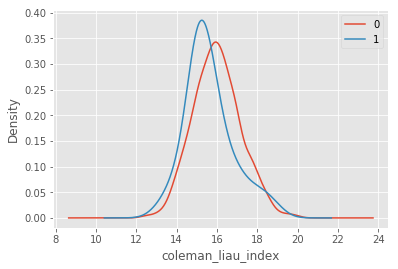

In [204]:
df.groupby('error_binary')['coleman_liau_index'].plot(kind='kde', legend = True); plt.xlabel('coleman_liau_index')

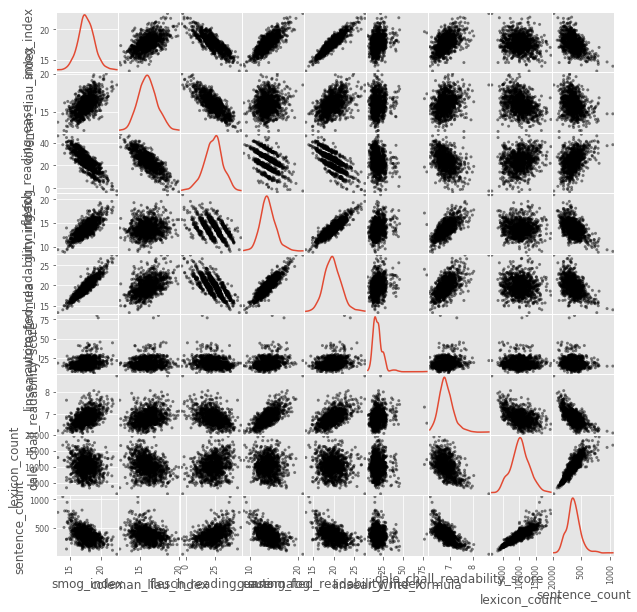

In [205]:
scatter_matrix(df.iloc[:, 0:-2], figsize=(10, 10), diagonal='kde', color = 'black')
plt.show()

In [40]:
# plt.matshow(df.corr())
# plt.show()
# df.corr()

In [256]:
df4 = df.groupby('error_binary').mean().transpose().round(1)
df4.index.names = ['Index']
df4.rename(columns={0:'No misreporting', 1:'Misreporting'}, inplace=True)
df4

error_binary,No misreporting,Misreporting
Index,,
smog_index,17.7,17.6
coleman_liau_index,16.0,15.6
flesch_reading_ease,23.7,23.5
gunning_fog,13.8,13.8
automated_readability_index,19.7,19.7
linsear_write_formula,18.8,17.5
dale_chall_readability_score,6.8,6.8
lexicon_count,10195.3,10650.5
sentence_count,375.7,389.1


Available

    Year \ Measure                      \ Output      (Author; description/purpose)
    ------------------------------------------------------------------------------------------------------------------
    1952 | gunning_fog                  | grade level (R. Gunning; involved in Newspaper and textbook publishing)
    1968 | automated_readability_index  | grade level (For U.S. Air Force; technical manuals)
         | linsear_write_formula        | grade level (For U.S. Air Force; technical manuals)
    1969 | smog_index                   | grade level (G. McLaughlin; New Gold standard replacing Gunning fog)
    1975 | coleman_liau_index           | grade level (M. Coleman & T. Liau; Characters instead of syllables per word)
    1975 | flesch_reading_ease          | 0 - 100     (R. Flesch; For U.S. Navy)
    1995 | dale_chall_readability_score | 4.9 - 9.9   (E. Dale & J. Chall)

Unavailable

    1953 | Spache readability formula   | grade level (G. Spache; Works best on texts for children up to fourth grade)
    1968 | Fry readability formula      | grade level (E. Fry; uses a graph)
    1977 | Raygor readability estimate  | grade level (A. Raygor; uses a graph)
    
    
Something based on the number of `prepositions`? (https://scholarworks.wmich.edu/cgi/viewcontent.cgi?referer=https://en.wikipedia.org/&httpsredir=1&article=1792&context=reading_horizons)
    

### Time Series Analysis

#### Statcheck results

In [290]:
counter = []
year = []
article = []
i = 0

directory1 = 'C:/Users/marco/Downloads/Learning R/Pvalueproject/Articles/'
for folder in os.listdir(directory1):
    directory2 = 'C:/Users/marco/Downloads/Learning R/Pvalueproject/Articles/' + folder + '/'
    for filename in os.listdir(directory2):
        i += 1
        counter.append(i)
        year.append(folder)
        article.append(filename[:-5])
        

dfYears = pd.DataFrame(year, counter, dtype='int')
dfYears.insert(1,'source',article)
dfYears = dfYears.rename(columns={0: "Year"})

dfYears = dfReduced.merge(dfYears, left_on = ['source'], right_on = ['source'], how='right')
dfYears2 = dfYears[['Year','source','error_binary']]
dfAnalysis = dfYears2.groupby("Year").agg(sum)

total = []
for i in range(len(dfYears2.groupby("Year")['Year'].value_counts())):
    total.append(dfYears2.groupby("Year")['Year'].value_counts()[i])
dfAnalysis.insert(1,'total',total)


dfAnalysis['checked'] = [0]*len(dfAnalysis)
for i in range(len(dfYears2)):
    if dfYears2['error_binary'][i] == 0 or dfYears2['error_binary'][i] == 1:
        dfAnalysis['checked'][int(dfYears2['Year'][i])] += 1

dfAnalysis['error_binary to total'] = dfAnalysis['error_binary'] / dfAnalysis['total']
dfAnalysis['error_binary to checked'] = dfAnalysis['error_binary'] / dfAnalysis['checked']
dfAnalysis['checked to total'] = dfAnalysis['checked'] / dfAnalysis['total']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


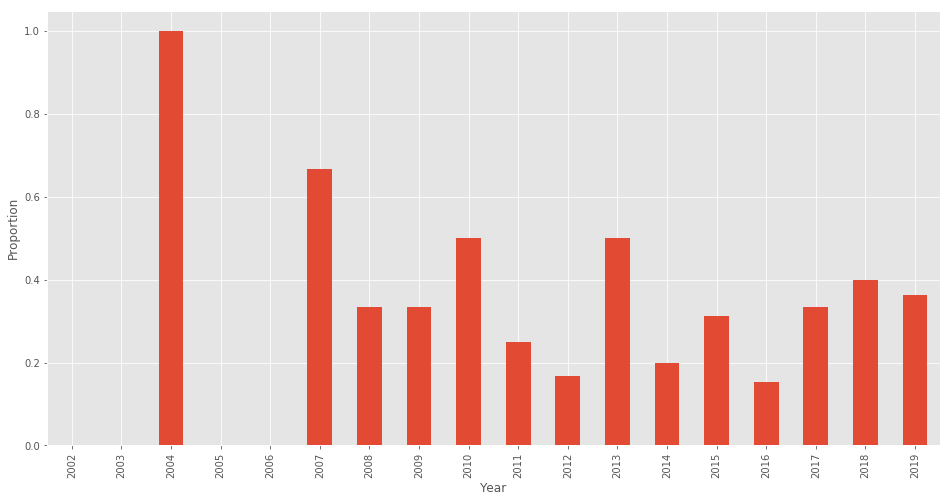

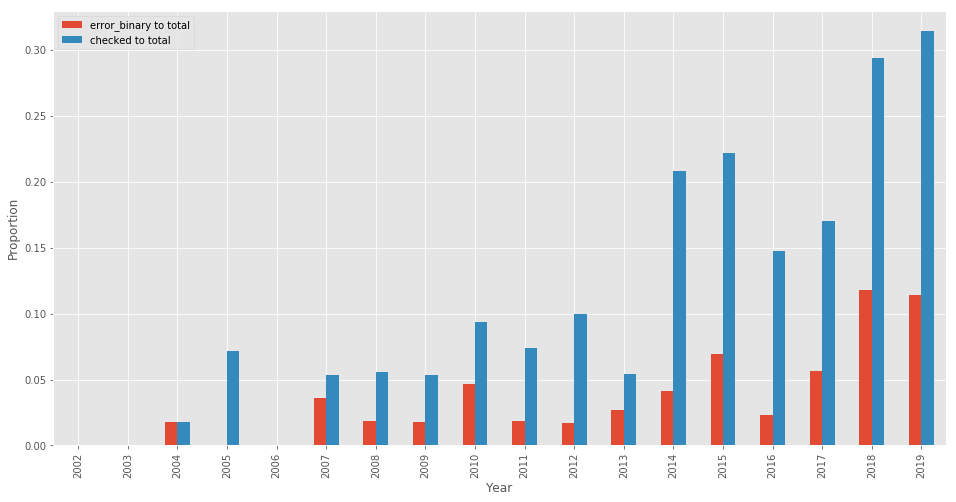

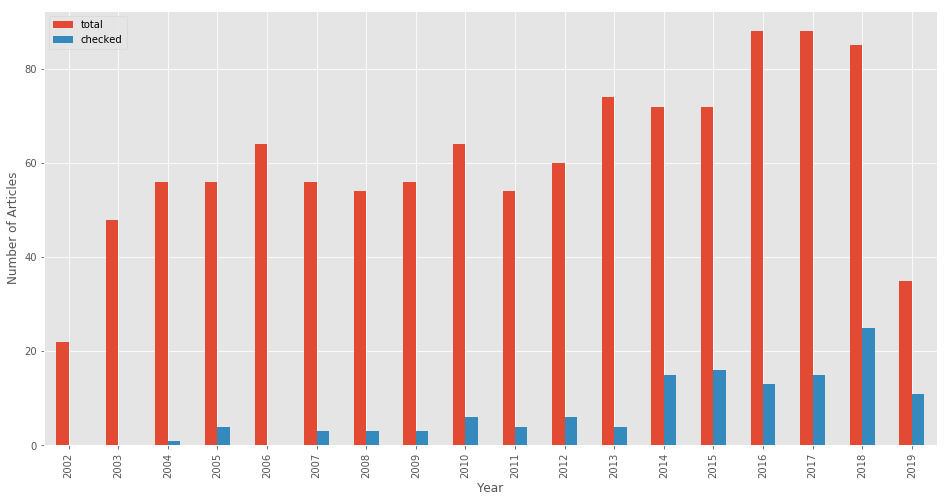

In [291]:
ax = dfAnalysis['error_binary to checked'].plot(kind='bar', figsize=(16, 8))
ax.set_ylabel('Proportion')
plt.savefig('Proportions Graph 1')

ax2 = dfAnalysis[['error_binary to total', 'checked to total']].plot(kind='bar', figsize=(16, 8))
ax2.set_ylabel('Proportion')
plt.savefig('Proportions Graph 2')

ax3 = dfAnalysis[['total','checked']].plot(kind='bar', figsize=(16, 8), legend=True)
ax3.set_ylabel('Number of Articles')
plt.savefig('Number of Articles')

#### Readability scores

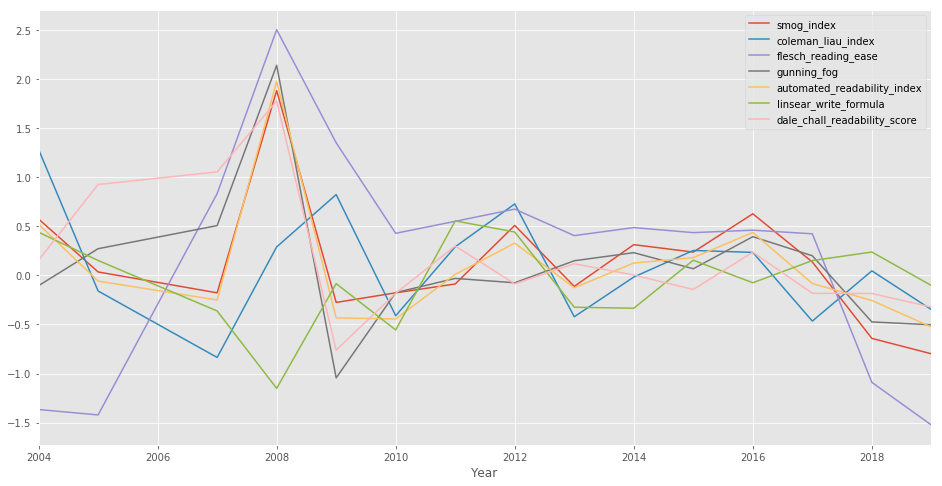

In [288]:
dfYear = dfYears
dfYear['smog_index'] = (dfYears['smog_index'] - dfYears['smog_index'].mean()) / dfYears['smog_index'].std()
dfYear['coleman_liau_index'] = (dfYears['coleman_liau_index'] - dfYears['coleman_liau_index'].mean()) / dfYears['coleman_liau_index'].std()
dfYear['flesch_reading_ease'] = (dfYears['flesch_reading_ease'] - dfYears['flesch_reading_ease'].mean()) / dfYears['flesch_reading_ease'].std()
dfYear['gunning_fog'] = (dfYears['gunning_fog'] - dfYears['gunning_fog'].mean()) / dfYears['gunning_fog'].std()
dfYear['automated_readability_index'] = (dfYears['automated_readability_index'] - dfYears['automated_readability_index'].mean()) / dfYears['automated_readability_index'].std()
dfYear['linsear_write_formula'] = (dfYears['linsear_write_formula'] - dfYears['linsear_write_formula'].mean()) / dfYears['linsear_write_formula'].std()
dfYear['dale_chall_readability_score'] = (dfYears['dale_chall_readability_score'] - dfYears['dale_chall_readability_score'].mean()) / dfYears['dale_chall_readability_score'].std()

dfYear.groupby("Year")['smog_index'].mean().plot(legend=True, figsize=(16, 8))
dfYear.groupby("Year")['coleman_liau_index'].mean().plot(legend=True)
dfYear.groupby("Year")['flesch_reading_ease'].mean().plot(legend=True)
dfYear.groupby("Year")['gunning_fog'].mean().plot(legend=True)
dfYear.groupby("Year")['automated_readability_index'].mean().plot(legend=True)
dfYear.groupby("Year")['linsear_write_formula'].mean().plot(legend=True)
dfYear.groupby("Year")['dale_chall_readability_score'].mean().plot(legend=True)
plt.savefig('Readability progression')